# Cleaning Events data

### Importing necessary libraries

In [1]:
pip install pandas matplotlib seaborn wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 100.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 127.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 103.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 125.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: y

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Loading the data

In [4]:
events = pd.read_csv('../sources/events.csv')
registered = pd.read_csv('../sources/registrados_en_eventos.csv')

## Data Cleaning

**Cleaning registered_in_events**

In [5]:
TO_DROP_REGISTERED = ['id', 'created_at','updated_at','status']

#Drop useless columns in registered_in_events

registered.drop(TO_DROP_REGISTERED, axis=1, inplace=True)

**Cleaning events**

In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           192 non-null    int64  
 1   description                  190 non-null    object 
 2   title                        192 non-null    object 
 3   lang                         84 non-null     object 
 4   url                          190 non-null    object 
 5   banner                       189 non-null    object 
 6   capacity                     192 non-null    int64  
 7   starting_at                  192 non-null    object 
 8   ending_at                    192 non-null    object 
 9   status                       192 non-null    object 
 10  created_at                   192 non-null    object 
 11  updated_at                   192 non-null    object 
 12  author_id                    0 non-null      float64
 13  event_type_id       

In [7]:
#Useless columns

TO_DROP_EVENTS = ['created_at','updated_at','organization_id','author_id']

#Drop useless columns in events

events.drop(TO_DROP_EVENTS, axis=1, inplace=True)

#Drop null columns in events
events.dropna(axis=1, how='all', inplace=True)



**Joining both datasets**

In [6]:
merged = pd.merge(registered, events, left_on="event_id", right_on="id").drop(['id','excerpt','eventbrite_sync_description','eventbrite_url','eventbrite_id','banner'], axis=1)
merged.shape

(5495, 23)

**Cleaning merged dataframe**

In [7]:
merged['starting_at'] = merged['starting_at'].apply(pd.to_datetime)
merged['ending_at'] = merged['ending_at'].apply(pd.to_datetime)
merged['published_at'] = merged['published_at'].apply(pd.to_datetime)

#Changing format
merged['starting_at'] = merged['starting_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
merged['ending_at'] = merged['ending_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
merged['published_at'] = merged['published_at'].dt.strftime('%Y-%m-%d %H:%M:%S')

#Format change also changed the column type to object, so we need to convert it to datetime again 
merged['starting_at'] = merged['starting_at'].apply(pd.to_datetime)
merged['ending_at'] = merged['ending_at'].apply(pd.to_datetime)
merged['published_at'] = merged['published_at'].apply(pd.to_datetime)

In [8]:
#Replacing commas in certain columns

merged['tags'] = merged['tags'].str.replace(',', '|')
merged['description'] = merged['description'].str.replace(',', ' ')
merged['title'] = merged['title'].str.replace(',', ' ')

#Replacing nulls with 'undefined'

merged = merged.replace(np.nan, 'Undefined', regex=True)

In [9]:
#Assign language to events with missing info.

merged['lang'] = np.where((merged['event_id'].isin([35,36,38,40,414,37,130,123,41,122,141,42,146,125,145,46,48,47,49,131,
                                                    127,85,86,84,121,128,119,181,189,184,135,134,136,182,192,193,137,138,
                                                    139,186,195,198,217,196,213,203,212,205,204,209,211,218,262,339,268,
                                                    260,263,142,183,140,432,261,363,264,344,340,308,316])),'es', merged['lang'])

merged['lang'] = np.where((merged['event_id'].isin([39,43,187,45,44,190,144,50,51,126,180,191,132,129,120,185,188,197,200,
                                                    194,199,201,202,206,216,208,252,214,251,254,368,357,124,207,210,215])),'en', 
                                                    merged['lang'])

In [10]:
#create a event tags dataframe to explode tags

tags_df = merged.groupby(['event_id','title','starting_at','tags'])['tags'].agg(['count']).reset_index()

In [11]:
tags_df.rename(columns = {'count':'event_registrants'}, inplace = True)
tags_df.shape

(160, 5)

In [12]:
#converting tags column in lowercase and then in a list instead of string

tags_df['tags'] = tags_df['tags'].str.lower()

tags_df['tags'] = tags_df.tags.apply(lambda x: x.split('|'))

In [13]:
#Exploding the list to rows

tags_df = tags_df.explode('tags').drop_duplicates()

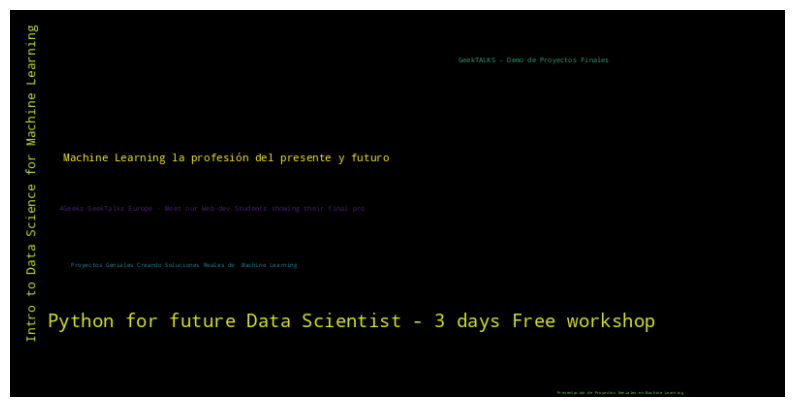

In [14]:
#Creating a word cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud


df_wc = tags_df[(tags_df['tags'] =='tech-machinelearning')]

df_wc = df_wc[['title','event_registrants']]
df_wc = df_wc.set_index('title').to_dict()['event_registrants']

wc = WordCloud(width=800, height=400, max_words=200,).generate_from_frequencies(df_wc)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
#Saving joined dataset

merged.to_csv('../output/events_and_registrants.csv')
tags_df.to_csv('../output/tags_df.csv')

**When joining with form_entries**

In [16]:
#forms = pd.read_csv('../sources/clean.csv')

In [17]:
#final_df = pd.merge(merged, forms[['email','country','deal_status','won_at']],on='email', how='left')


In [18]:
#final_df[['starting_at','won_at']] = final_df[['starting_at','won_at']].apply(pd.to_datetime)

In [19]:
#final_df['days_until_deal'] = (final_df['won_at'] - final_df['starting_at']).dt.days


In [20]:
#final_df[final_df['won_at'] > final_df['starting_at']][['email','deal_status','starting_at','won_at','days_until_deal']].sort_values('days_until_deal')